# ML-Fundamentals - Neural Networks - Exercise: Minimal Fully Connected Network for MNIST

## Table of Contents
* [Requirements](#Requirements) 
  * [Modules](#Python-Modules) 
  * [Data](#Data)
* [Simple MNIST Network](#Simple-MNIST-Network)
  * [Todo: Transparency](#Todo:-Transparency)
  * [Todo: Comprehension](#Todo:-Comprehension)
  * [Todo: Step towards a NN-Framework](#Todo:-Step-towards-a-NN-Framework)

# Requirements


## Python-Modules

In [2]:
# third party
import numpy as np
import matplotlib.pyplot as plt

# internal
from deep_teaching_commons.data.fundamentals.mnist import Mnist

## Data

In [3]:
# create mnist loader from deep_teaching_commons
mnist_loader = Mnist(data_dir='data')

# load all data, labels are one-hot-encoded, images are flatten and pixel squashed between [0,1]
train_images, train_labels, test_images, test_labels = mnist_loader.get_all_data(one_hot_enc=True, normalized=True)

# shuffle training data
shuffle_index = np.random.permutation(60000)
train_images, train_labels = train_images[shuffle_index], train_labels[shuffle_index]

auto download is active, attempting download
mnist data directory already exists, download aborted


# Simple MNIST Network
The presented network is an adaptation of Michael Nielson's introductory example to neural networks. It is recommended, though not necessary, to read the first two chapters of his great online book ['Neural Networks and Deep Learning'](http://neuralnetworksanddeeplearning.com/) for a better understanding of the given example. Compared to the [original](https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/src/network.py) by Nielsen, the present variant was vectorized and the sigmoid activation function replaced by a rectified linear unit function (ReLU). As a result, the code is written much more compact, and the optimization of the model is much more efficient. 

## Todo: Transparency
Your goal is to understand how the implementation works. Therefore your tasks are as follows:
  - (2) Add comments to functions and lines of code. Follow the [Google-Pyhton](https://google.github.io/styleguide/pyguide.html) guidelines for comments.
  - (2) Add a verbose argument (`boolean`) to the functions that adds meaningful `print` lines to the network, if it is `true`.
  - (2) Add a variable `delta_hist` which store the delta value calculated on the output layer during each iteration of the function `grads(X,Y,weights)`. After the optimization process plot `delta_hist`.

Epoch: 0 Accuracy: 0.8837 Delta: -0.2799427560280326
Epoch: 1 Accuracy: 0.9137 Delta: -0.2296630305576574
Epoch: 2 Accuracy: 0.9246 Delta: -0.20410599142712338
Epoch: 3 Accuracy: 0.9318 Delta: -0.18828404498956103
Epoch: 4 Accuracy: 0.9361 Delta: -0.1778559015781811
Epoch: 5 Accuracy: 0.941 Delta: -0.16931805272658243
Epoch: 6 Accuracy: 0.9454 Delta: -0.1620255864333902
Epoch: 7 Accuracy: 0.948 Delta: -0.15510173956668855
Epoch: 8 Accuracy: 0.9503 Delta: -0.14990772869699637
Epoch: 9 Accuracy: 0.9523 Delta: -0.14550967380522073
Epoch: 10 Accuracy: 0.9534 Delta: -0.1416436612974089
Epoch: 11 Accuracy: 0.9546 Delta: -0.1378765870599855
Epoch: 12 Accuracy: 0.9562 Delta: -0.13418580165510263
Epoch: 13 Accuracy: 0.9571 Delta: -0.13034695398977136
Epoch: 14 Accuracy: 0.9585 Delta: -0.12647214253535172
Epoch: 15 Accuracy: 0.9596 Delta: -0.12276213535994261
Epoch: 16 Accuracy: 0.96 Delta: -0.11883950348824072
Epoch: 17 Accuracy: 0.9606 Delta: -0.11547276651687569
Epoch: 18 Accuracy: 0.9616 Del

(-1, 0)

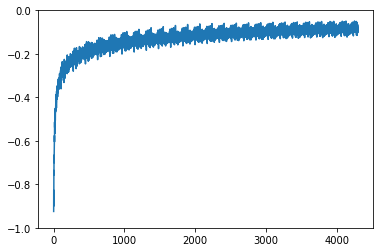

In [14]:
delta_hist =[]

def feed_forward(X, weights):
    """Preforms the forward pass.
    
    Retrieves the inputs and the weights.
    And does a matrix multiplication
    
    
        Args:
            X: A batch of inputs
            weights: The weights
            
        Returns:
            A batch of calculated outputs
        
    """
    
    a = [X]
    for w in weights:
        a.append(np.maximum(a[-1].dot(w),0))
    return a

def grads(X, Y, weights):
    """Calculates the gradiants and preforms the backpropagation
    
    This function calculates the gradiants and passes the 
    new weights together with the inputs to forward pass.
    
        Args:
            X: A batch of inputs
            Y: A batch of labels
            weights: weights to calculate the new gradient
        
        Returns:
            The new gradients

    """
    grads = np.empty_like(weights)
    a = feed_forward(X, weights)
    # https://brilliant.org/wiki/backpropagation/ or https://stats.stackexchange.com/questions/154879/a-list-of-cost-functions-used-in-neural-networks-alongside-applications
    delta = a[-1] - Y

    
    delta_hist.append(np.sum(delta*Y)/len(X))
    grads[-1] = a[-2].T.dot(delta)
    for i in range(len(a) - 2, 0, -1):
        delta = (a[i] > 0) * delta.dot(weights[i].T)
        grads[i - 1] = a[i-1].T.dot(delta)
        
    return grads / len(X)

trX, trY, teX, teY = train_images, train_labels, test_images, test_labels
weights = [np.random.randn(*w) * 0.1 for w in [(784, 200), (200,100), (100, 10)]]
num_epochs, batch_size, learn_rate = 25, 350, 0.1
verbose = True

for i in range(num_epochs):
    for j in range(0, len(trX), batch_size):
        X, Y = trX[j:j+batch_size], trY[j:j+batch_size]
        weights -= learn_rate * grads(X, Y, weights)
        
    prediction_test = np.argmax(feed_forward(teX, weights)[-1], axis=1)
    if verbose: 
        print ('Epoch:', i, 'Accuracy:', np.mean(prediction_test == np.argmax(teY, axis=1)), 'Delta:', delta_hist[-1])
    
plt.plot(delta_hist)
plt.ylim(ymax = 0, ymin= -1)

## Todo: Comprehension
Hopefully, this implementation of a neural network is clear now. As a check answer the following questions (a few sentences, no novels):
  - (2) Which cost function is used, what is its derivation and how is it implemented?
      - The softmax loss function is used.
  - (2) Why are the boundaries of your plot between [-1,0], why it is so noisy, how do you can reduce the noice and what is the difference to a usual plot of a loss function?
      - To reduce the noise I chose a bigger batch size. Usually the loss is positive, so the whole plot wouln't be in between -1 and 0.
  - (2) How does the network implement the backpropagation algorithm?

## Todo: Step towards a NN-Framework
The presented implementation is compact and efficient, but hard to modify or extend. However, a modular design is crucial if you want to experiment with a neural network to understand the influence of its components. Now you make the first changes towards your own 'toy-neural-network-framework', which you should expand in the progress of exercise 03. 

(5) Rework the implementation from above given the classes and methods below. Again, you _do not_ have to re-engineer the whole neural network at this step. Rework the code to match the given specification and do necessary modifications only. For your understanding, you can change the names of the variables to more fitting ones.

Epoch: 0 Accuracy: 0.8616 Delta: -0.31062338182183397
Epoch: 1 Accuracy: 0.8953 Delta: -0.25383153237049716
Epoch: 2 Accuracy: 0.9112 Delta: -0.22598899473382533
Epoch: 3 Accuracy: 0.9176 Delta: -0.20782047423094685
Epoch: 4 Accuracy: 0.9249 Delta: -0.1941299298136434
Epoch: 5 Accuracy: 0.9294 Delta: -0.1837170430278908
Epoch: 6 Accuracy: 0.9331 Delta: -0.17471101923130772
Epoch: 7 Accuracy: 0.9363 Delta: -0.16800331832645102
Epoch: 8 Accuracy: 0.9393 Delta: -0.16214672759443946
Epoch: 9 Accuracy: 0.9421 Delta: -0.15763401940953686
Epoch: 10 Accuracy: 0.9437 Delta: -0.15333189723157697
Epoch: 11 Accuracy: 0.946 Delta: -0.14898153617382753
Epoch: 12 Accuracy: 0.9474 Delta: -0.14536833613339928
Epoch: 13 Accuracy: 0.9484 Delta: -0.14194776317258923
Epoch: 14 Accuracy: 0.9497 Delta: -0.13894605001659607
Epoch: 15 Accuracy: 0.9514 Delta: -0.13591148279401535
Epoch: 16 Accuracy: 0.9525 Delta: -0.13329113121557584
Epoch: 17 Accuracy: 0.9527 Delta: -0.13074783204972015
Epoch: 18 Accuracy: 0.9

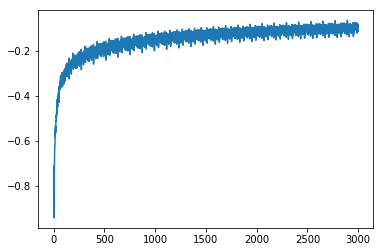

In [17]:
class FullyConnectedNetwork:
    def __init__(self, layers):
        self.layers = layers
        self.weights = [np.random.randn(*weight) * 0.1 for weight in self.layers]
        self.delta_hist = []
        
    def forward(self, data):
        a = [data]
        for weight in self.weights:
            a.append(np.maximum(a[-1].dot(weight), 0))
            
        return a

    def backward(self, X, Y):
        grads = np.empty_like(self.weights)
        a = self.forward(X)
        delta = a[-1] - Y

        self.delta_hist.append(np.sum(delta * Y) / len(X))
        grads[-1] = a[-2].T.dot(delta)
        
        for i in range(len(a) - 2, 0, -1):
            delta = (a[i] > 0) * delta.dot(self.weights[i].T)
            grads[i - 1] = a[i - 1].T.dot(delta)

        return grads / len(X)


    def predict(self, data):
        return self.forward(data)
            
class Optimizer:
    def __init__(self, network, train_data, train_labels, test_data=None, test_labels=None, epochs=100, batch_size=20, learning_rate=0.01):
        self.network = network
        self.train_data = train_data
        self.train_labels = train_labels
        self.test_data = test_data
        self.test_labels = test_labels
        self.epochs = epochs
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        
    def sgd(self, verbose = True):        
        for i in range(self.epochs):
            for j in range(0, len(self.train_data), self.batch_size):
                X, Y = self.train_data[j:j + self.batch_size], self.train_labels[j:j + self.batch_size]
                self.network.weights -= self.learning_rate * self.network.backward(X, Y)

            prediction_test = np.argmax(self.network.predict(self.test_data)[-1], axis=1)
            if verbose: 
                print ('Epoch:', i, 'Accuracy:', np.mean(prediction_test == np.argmax(self.test_labels, axis=1)), 'Delta:', self.network.delta_hist[-1])
    
    

    
# Following code should run:    
mnist_NN = FullyConnectedNetwork([(784, 200),(200,100),(100, 10)]) 
epochs, batch_size, learning_rate = 25, 500, 0.1
Optimizer(mnist_NN, train_images, train_labels, test_images, test_labels, epochs, batch_size, learning_rate).sgd(True)

plt.plot(mnist_NN.delta_hist)